# Regressão logística com regularização

## Bibliotecas

Serão utilizadas as bibliotecas numpy para a realização de operações matemáticas em array e matrizes multidimensionais, pandas para a importação do dataset, matplotlib para plotagem de gráficos e scipy para otimizar o modelo da regressão logística.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Importação dos dados

In [2]:
data = pd.read_csv('data/ex2data2.txt',header=None)

In [3]:
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
data.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


In [5]:
X = np.array(data.iloc[:,0:-1])
y = np.array(data.iloc[:,2])
m = len(y)

## Visualização de dados

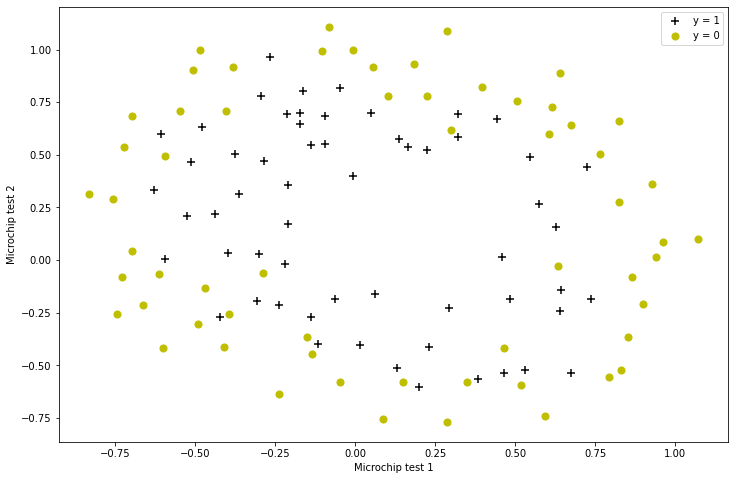

In [6]:
pos = X[y == 1]
neg = X[y == 0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pos[:, :-1], pos[:, -1:], s=50, c='k', marker='+', label='y = 1')
ax.scatter(neg[:, :-1], neg[:, -1:], s=50, c='y', marker='o', label='y = 0')
ax.legend()
ax.set_xlabel('Microchip test 1')
ax.set_ylabel('Microchip test 2')
plt.show()

## Mapeamento de características

O mapeamento de característica irá criar mais características a partir das já existentes para tornar os dados mais apropriados. Serão mapeadas características para todos os termos polinomiais de x1 e x2, até a sexta potência.

In [7]:
def mapFeature(X1, X2, degree=6):
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)
    
feature_1 = np.array(X[:,0])
feature_2 = np.array(X[:,1])
X_mf = mapFeature(feature_1, feature_2)

## Função de custo e gradiente

O termo de regularização $\frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2$ é adiciona a função de custo e impõe uma penalidade sobre o custo total, o hiperparâmetro $\lambda$ controla o grau de regularização imposto.

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log\left(h_\theta(x^{(i)})\right) + (1 - y^{(i)}) \log\left(1 - h_\theta(x^{(i)})\right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

In [8]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def compute_cost(theta, X, y, l):
    grad0 = y * np.log(sigmoid(X @ theta))
    grad1 = (1 - y) * np.log(1 - sigmoid(X @ theta))
    return -(1 / m) * np.sum(grad0 + grad1) + (l / (2 * m)) * np.sum(theta[1:] ** 2)

theta = np.zeros(X_mf.shape[1])
print(f'Custo: {compute_cost(theta, X_mf, y, 1)}')

Custo: 0.6931471805599454


Para o gradiente não devemos penalizar o $\theta_0$, portanto deve ser separado dos outros parâmetros. O termo $\frac{\lambda}{m} \theta_j$ aplica a regularização nos demais parâmetros.

$$ \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right) x^{(i)}_0 $$
$$ \theta_j := \theta_j - \alpha \left[ \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right) x^{(i)}_j \right] + \frac{\lambda}{m} \theta_j \qquad j \in \{1, 2, \ldots, n\} $$

In [9]:
def gradient(theta, X, y, l):
    grad = (X.T @ (sigmoid(X @ theta) - y)) / m
    grad[1:] = grad[1:] + (l / m) * theta[1:]
    return grad

Para $\lambda = 0$

In [10]:
l = 0
result = opt.fmin_tnc(func=compute_cost, x0=theta, fprime=gradient, args=(X_mf, y, l))
theta_fit = result[0]
print(f'Parâmetros theta: {theta_fit}')
print(f'Custo: {compute_cost(theta_fit, X_mf, y, l)}')

Parâmetros theta: [   8.75312559    9.13522861    8.1557338   -91.89341738  -53.79313661
  -23.04611989  -86.57873411  -98.32133347  -22.0415813    -1.38279987
  344.95971224  358.11069877  362.64207615  151.84968174   10.54466666
  174.04583696  314.28147156  306.90610762  162.58850745    3.48032782
   -5.85382039 -424.71642804 -648.07996281 -818.24533738 -611.4531384
 -478.46223475 -156.08246782   -4.32307348]
Custo: 0.25655991709425274


Para $\lambda = 100$

In [11]:
l = 100
result = opt.fmin_tnc(func=compute_cost, x0=theta, fprime=gradient, args=(X_mf, y, l))
theta_fit = result[0]
print(f'Parâmetros theta: {theta_fit}')
print(f'Custo: {compute_cost(theta_fit, X_mf, y, l)}')

Parâmetros theta: [ 0.02187847 -0.0174817   0.00571065 -0.05516901 -0.01314874 -0.03859873
 -0.01846356 -0.00773219 -0.00892429 -0.02280461 -0.04343846 -0.00235623
 -0.01415612 -0.00349507 -0.04143595 -0.02100593 -0.00471917 -0.00359131
 -0.00632226 -0.0050244  -0.03197683 -0.03416334 -0.00107629 -0.00702615
 -0.00038507 -0.0079823  -0.00154779 -0.04108683]
Custo: 0.6864838338727017


Para $\lambda = 1$

In [12]:
l = 1
result = opt.fmin_tnc(func=compute_cost, x0=theta, fprime=gradient, args=(X_mf, y, l))
theta_fit = result[0]
print(f'Parâmetros theta: {theta_fit}')
print(f'Custo: {compute_cost(theta_fit, X_mf, y, l)}')

Parâmetros theta: [ 1.27271027  0.62529965  1.18111687 -2.01987402 -0.91743188 -1.43166929
  0.12393226 -0.36553119 -0.35725406 -0.17516293 -1.45817008 -0.05098418
 -0.61558558 -0.27469165 -1.19271298 -0.2421784  -0.20603302 -0.04466176
 -0.27778947 -0.29539514 -0.45645982 -1.04319154  0.02779373 -0.29244865
  0.01555759 -0.32742404 -0.14389149 -0.92467488]
Custo: 0.5290027299645124


## Esboço da fronteira de decisão



theta:  [ 1.27271027  0.62529965  1.18111687 -2.01987402 -0.91743188 -1.43166929
  0.12393226 -0.36553119 -0.35725406 -0.17516293 -1.45817008 -0.05098418
 -0.61558558 -0.27469165 -1.19271298 -0.2421784  -0.20603302 -0.04466176
 -0.27778947 -0.29539514 -0.45645982 -1.04319154  0.02779373 -0.29244865
  0.01555759 -0.32742404 -0.14389149 -0.92467488]


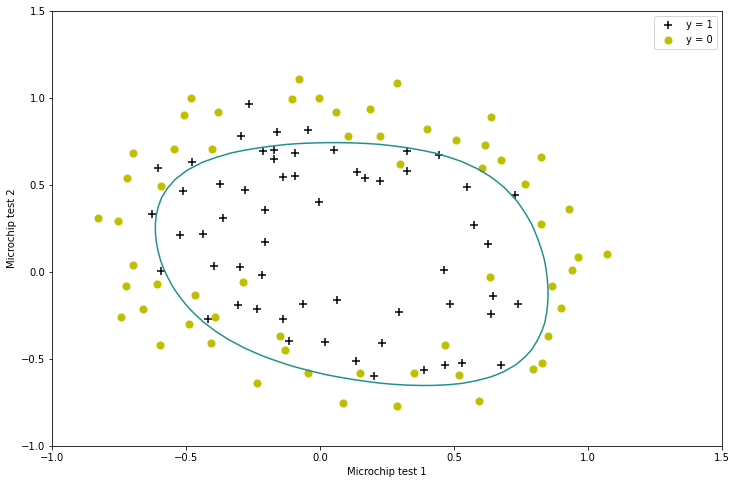

In [18]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta_fit)
     
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pos[:, :-1], pos[:, -1:], s=50, c='k', marker='+', label='y = 1')
ax.scatter(neg[:, :-1], neg[:, -1:], s=50, c='y', marker='o', label='y = 0')
ax.contour(u,v,z,0)
ax.legend()
ax.set_xlabel('Microchip test 1')
ax.set_ylabel('Microchip test 2')
print('theta: ', theta_fit)

O gráfico ilustra a fronteira de decisão que foi aprendida ao treinar o modelo de regressão logística, na parte de dentro da fronteira de decisão se encontram os microchip aprovados nos testes e por fora os reprovados.